Code from: PyTorch深度學習入門與應用：必備實作知識與工具一本就學會
ISBN：9786263332591

In [1]:
from PIL import Image
import torch
from torchvision import transforms
from torchvision import models
import numpy as np
import pandas as pd

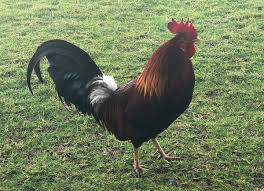

In [2]:
img=Image.open("data/cock.jpeg")
#img.show()
img

In [3]:
preprocess = transforms.Compose([
    transforms.Resize(256), #Resize the image to 256 pixels on the shortest side while maintaining aspect ratio.
    transforms.CenterCrop(244), #Crop the center of the image to make it 244 pixels in both height and width.
    transforms.ToTensor() #Convert the image to a PyTorch tensor. This also scales the image's pixel values to [0, 1].
])


In [4]:
# Apply preprocessing transformations to the input image 'img'
# This typically includes operations such as resizing, normalization, etc.,
# to match the input specifications of the model (e.g., ResNet-18).
img2 = preprocess(img)
print(img2.shape)

torch.Size([3, 244, 244])


In [5]:
# Add an extra dimension to 'img2' at the first position (dimension index 0).
# This operation transforms 'img2' from a 3D tensor (C x H x W) to a 4D tensor (1 x C x H x W),
# simulating a batch of size 1. PyTorch models typically expect inputs in batches,
# so this step is necessary for a single image.
# 'torch' is the main namespace of PyTorch; 'unsqueeze' is a function that adds a dimension of size one.
img3 = torch.unsqueeze(img2, 0)
print(img3.shape)

torch.Size([1, 3, 244, 244])


In [6]:
resnet=models.resnet18(weights='ResNet18_Weights.DEFAULT')

In [7]:
# Sets the ResNet model to evaluation mode.
resnet.eval()
out=resnet(img3)

In [8]:
out_numpy=out.detach().numpy()  # 轉為NumPy
out_class=np.argmax(out_numpy, axis=1)  # 找出最大值的索引
print(out_class)

[7]


In [9]:
df=pd.read_csv("data/imagenet_classes.csv",header=None)
print(df.head())

   0                   1
0  0               tench
1  1            goldfish
2  2   great_white_shark
3  3         tiger_shark
4  4          hammerhead


In [10]:
label = df.iloc[out_class].values
print(label)

[[7 ' cock']]


In [11]:
score = torch.nn.functional.softmax(out, dim=1)[0] * 100
print(score.shape)

torch.Size([1000])


In [12]:
print(f"score:{score[out_class].item():.2f}")

score:64.83
